<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**3.5 K-Means**##

k-means clustering a popular method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with teh nearest mean that serves as a prototype of the cluster. k-means clustering minimizes within cluster variances. While k-means general converge quickly to a local optimum, the problem is computationally difficult.

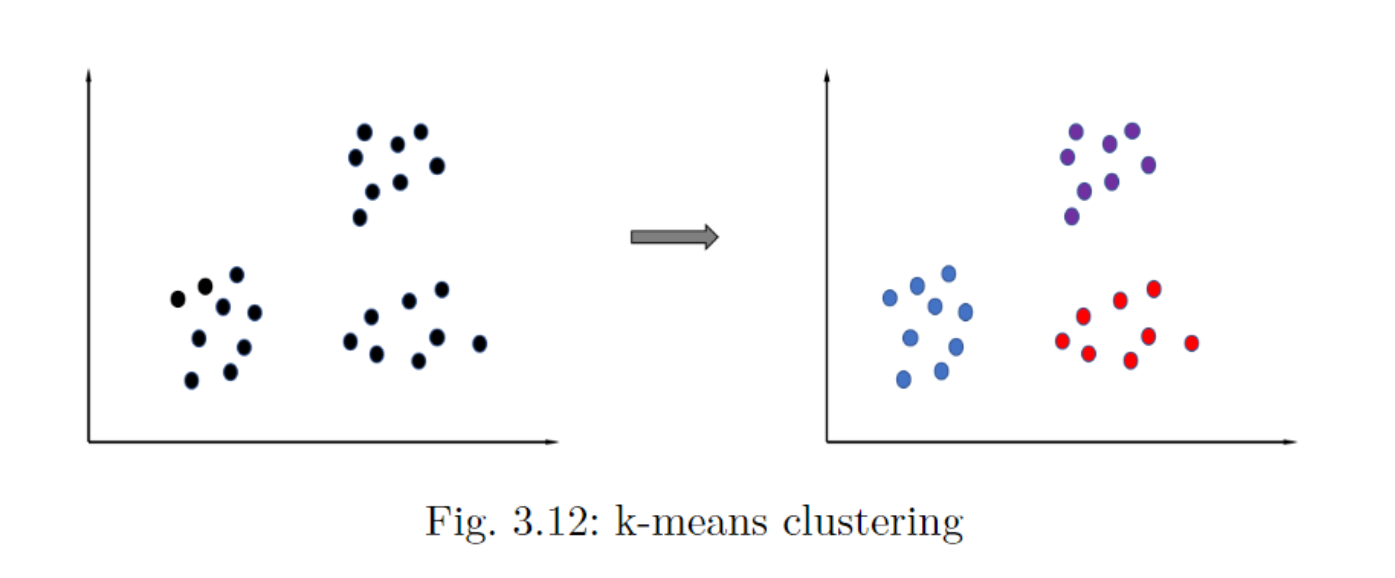

The K-means clustering algorithm:
1. Clusters the data into k groups where k is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2,3,and 4 until the same points are assigned to each cluster in consecutive rounds.

In short, k-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

The example below will estimate the best value for K using the elbow method, then use K-means clustering to group the data points into clusters.

First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data.

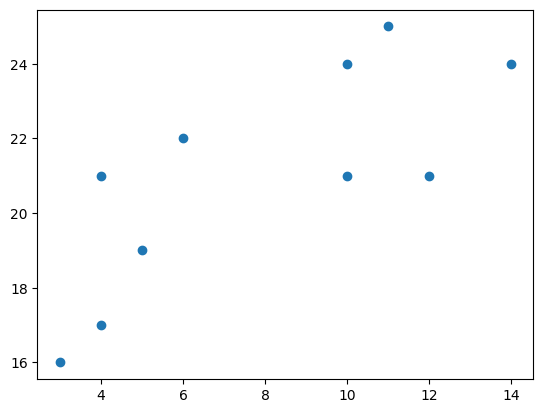

In [1]:
#visualize some data points
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

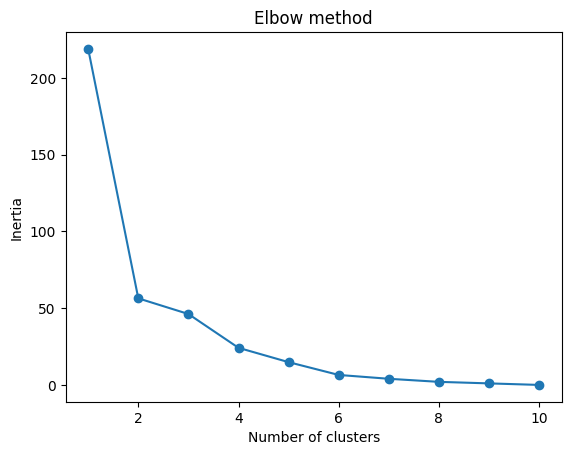

In [2]:
#Now we utilize elbow method to visualize inertia for different values of K

from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

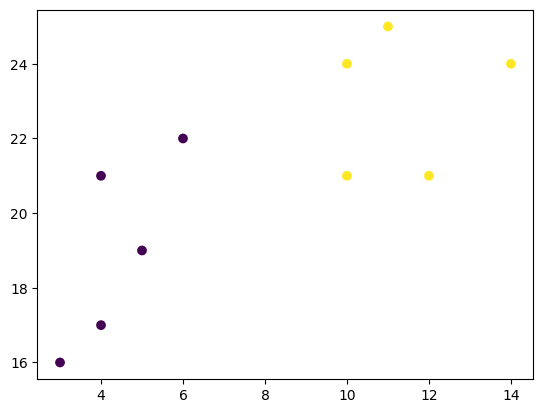

In [3]:
#The elbow method shows that 2 is a good value for K, so we retrain and visualize the result
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
print(data)


[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In order to find the best value for K, we need to run K-means across our data for a range of possible values. We only have 10 data points, so the maximum number of clusters is 10. So for each value K in range(1,11), we train a K-means model and plot the intertia at that number of clusters:

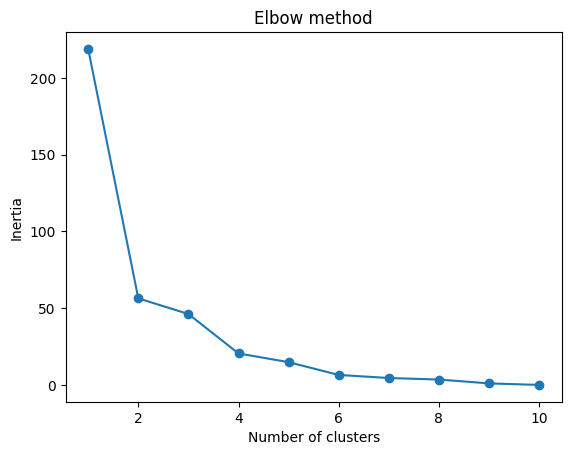

In [5]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We can see that the "elbow" on the graph above (where the interia becomes more linear) is at K=2. We can then fit our K-means algorithm one more time and plot the different clusters assigned to the data:

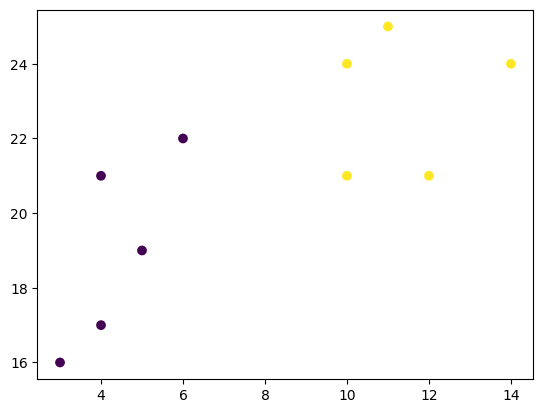

In [6]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

##**3.6 Support Vector Machine**##

Support-vector machines (SVMs) are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis.Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

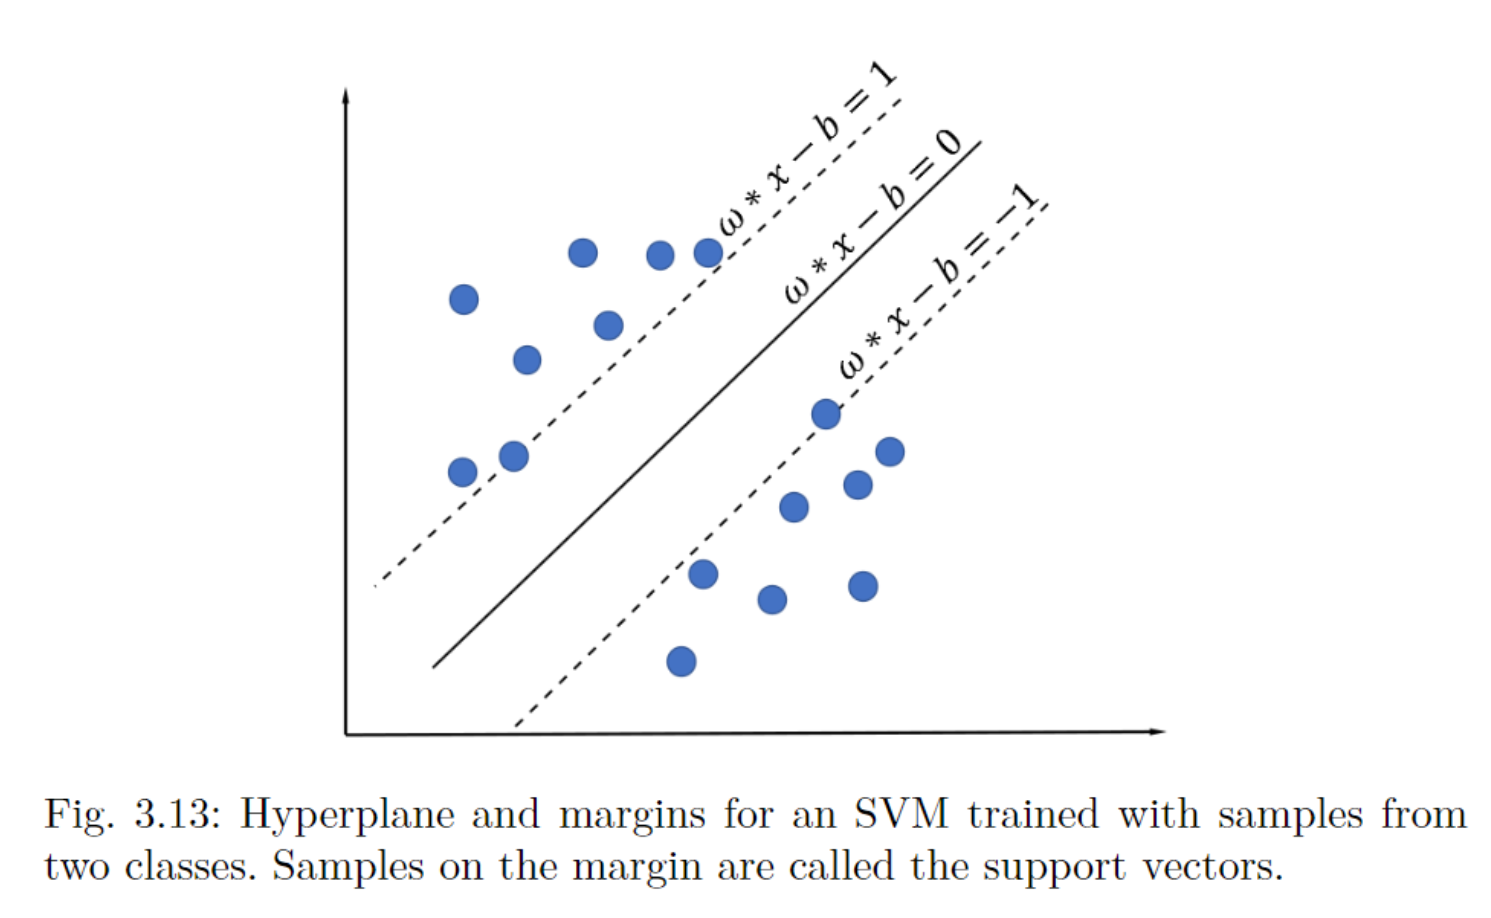

**What is Support Vector Machine?**

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

**What does SVM do?**

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. Let you have basic understandings from this article before you proceed further. Here I’ll discuss an example about SVM classification of cancer UCI datasets using machine learning tools i.e. scikit-learn compatible with Python. Pre-requisites: Numpy, Pandas, matplot-lib, scikit-learn Let’s have a quick example of support vector classification. First we need to create a dataset:

You must import the necessary Python libraries so that you can work with the default of the credit card clients data set, perform data preprocessing, and build and evaluate your SVM model. These libraries are crucial for data manipulation, visualization, and machine learning tasks. If they're not installed, you can resolve this with a quick pip install.

The study associated with this data set focused on customers' default payments and compared the predictive accuracy of the probability that a client will default on payment across six data mining methods. It used a binary variable, "default payment" (Yes = 1; No = 0), as the response variable and used 23 variables as explanatory variables.

In [17]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
!pip3 install xlrd

# Import the data set
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)

Prior to initiating data preprocessing, you should conduct an exploratory data analysis to understand the data's structure and format, including the types of variables, their distributions, and the overall organization of information. This exploration direct the modeling approach.

In [18]:
#Explore the first ten rows of the data set
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In the output provided, each row represents an individual entry. The columns represent specific features like the identification number, credit limit, sex, education, marriage status, age, payment status across several months, bill statement amounts, payment amounts, and a target variable indicating default in the following month. The numerical data in each column provides information about the respective feature or attribute. The "default payment next month" column represents the class label or target variable for classification tasks in an SVM.

In [19]:
# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#Remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


To clean up the data set, rename and simplify the "default payment next month" column to "DEFAULT", making it convenient for further analysis or modeling tasks. The DataFrame also no longer contains the ID column because it is considered non-informative for analysis or modeling tasks.

In this step, you proceed with data preprocessing to refine the data for subsequent analysis and modeling tasks. You ensure that each column only contains acceptable values by checking for null or invalid inputs based on the data definitions.

In [20]:
# check dimensions for invalid values
df['SEX'].unique()
df['MARRIAGE'].unique()
df['EDUCATION'].unique()
df['AGE'].unique()

# count missing or null values
print(len(df[pd.isnull(df.SEX)]))
print(len(df[pd.isnull(df.MARRIAGE)]))
print(len(df[pd.isnull(df.EDUCATION)]))
print(len(df[pd.isnull(df.AGE)]))

#count of missing data
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]) #output: 68

0
0
0
0


68

In [21]:
#Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

<ipython-input-22-b205f57e5f4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')


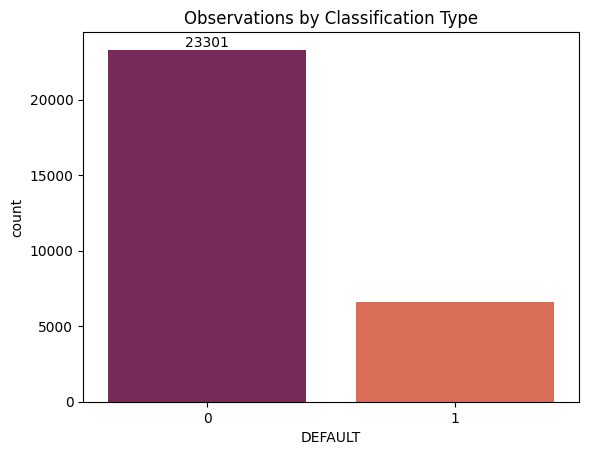

In [22]:
# Explore distribution of data set
# count plot on ouput variable
ax = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

The output displays the count of accounts with and without a credit card default, indicating an unbalanced data set. To address this, downsample the data to balance it out.

You balance the data set by splitting the data set into two categories: individuals regularly paying their credit card debt (default) and individuals whose debt remains unpaid (no default). You then downsample the data set by obtaining 1,000 samples for each category, representing the default payment as Yes = 1 and No = 0. From there, you merge the two data sets to create your balanced data set.


In [23]:
from sklearn.utils import resample

# split data
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==1)]

# downsample the data set
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42 )
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 )

#check ouput
len(df_no_default_downsampled)
len(df_default_downsampled)

# merge the data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ])
len(df_downsample)

2000

Scikit-learn does not natively support categorical data, and as a result, you must transform this data using hot-encoding, which codes each category in a given column as a binary variable using 0 or 1. This data transformation prevents SVM from treating the data as continuous, and ensures that each categorical variable has an equal likelihood of clustering together. You use OneHotEncoder for this task.

In [24]:
from sklearn.preprocessing import OneHotEncoder
# isolate independent variables
X = df_downsample.drop('DEFAULT', axis=1).copy()

ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
X_ohe_train = ohe.transform(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

X_ohe_train

transformed_ohe = pd.DataFrame(
    data=X_ohe_train,
    columns=ohe.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
    index=X.index,
)
transformed_ohe.head()

# merge dataframes
X_encoded = pd.concat([X, transformed_ohe], axis=1)
X_encoded

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,2,3,1,28,0,0,0,0,-2,...,0,1,0,0,0,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16004,180000,2,2,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,1,0,0,0,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
14072,320000,1,1,1,43,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,0,0,1,0,0,0,0,0,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


You must split the data set into two distinct sets: the training set and the test set. The training set trains the SVM model to differentiate between different classes based on the features provided. The test set helps you to evaluate model performance.

You should also scale your data before applying your SVM model to the data. This means that your independent variables (that is, X_encoded) have a mean of zero and a standard deviation of 1. As noted in this paper, you scale the data "to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges," enabling SVMs to find an optimal solution more quickly.

In [25]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

I built an initial SVM classifier, fitting my training data on the model and evaluating it with the test data set. I then plot the results using a confusion matrix to evaluate model performance.

Accuracy: 68.50%


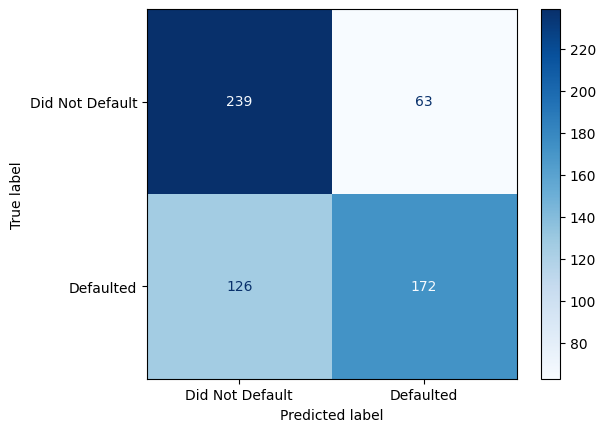

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Import accuracy_score

clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) # Now accuracy_score is defined
print(f'Accuracy: {accuracy:.2%}')

class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)

Here, I can see that your classifier did not perform as well as expected. Of the 302 accounts that did not default, and of the 298 accounts that did default, only 79% (239 accounts) and 58% (172 accounts) were correctly classified in their respective categories.

To improve model performance, I can use both cross validation and GridSearchCV() to find the optimal hyperparameters within your model. More specifically, I'm looking to identify the best values for my regularization parameter (C), gamma, and kernel.

I can recall from my SVM explainer that my C parameter applies a penalty for misclassifications and your gamma parameter applies weights for different data points. It's important to be aware that higher values of gamma have a tendency to increase the risk of overfitting the training set, which in turn leads to poor generalization onto new data. For the sake of data processing time, I only use the radial basis function kernel (RBF kernel) for this hyperparameter optimization, but note that this could include other kernels, such as poly or sigmoid.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.682 total time=   0.4s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.689 total time=   0.3s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.725 total time=   0.3s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.714 total time=   0.3s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.707 total time=   0.3s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.525 total time=   0.4s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.561 total time=   0.5s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.536 total time=   0.4s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.582 total time=   0.5s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.554 total time=   0.3s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.3s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

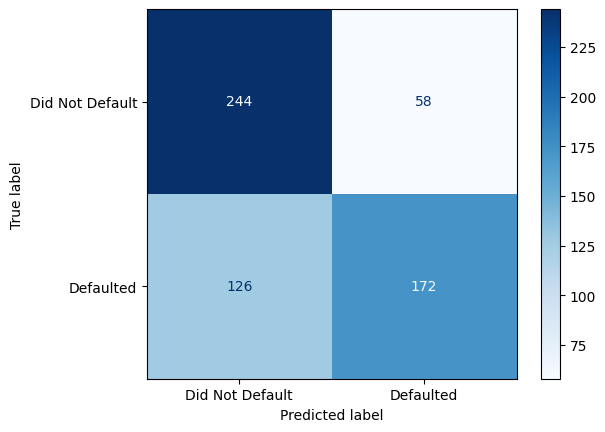

In [28]:
param_grid = {'C':[0.5,0.1,1,10,100,1000],
              'gamma':['scale', 1,0.1, 0.01,0.001,0.0001],
              'kernel':['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)
optimal_params.fit(X_train_scaled, y_train)

# see "best" parameters
optimal_params.best_params_

# refit model with optimal hyperparameters
grid_predictions = optimal_params.predict(X_test.values)
clf_svm = SVC(random_state = 42, C=.5, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# plot confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)

The new confusion matrix demonstrates that hyperparameter tuning didn't help improve the model much. I've seen minor improvements to the classification of accounts that did not default. Now, the model correctly classifies 81% of the data correctly versus 79%. Overall, I've improved the accuracy score of the model by less than 1 percentage point.

Because it is difficult to visualize data in high dimensional spaces, such as this 24-column data set, I can use a dimensionality reduction approach, such as PCA, to help me project the data in a lower dimensional space.

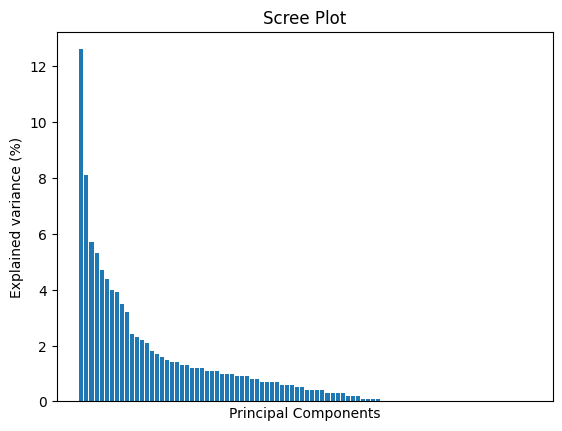

In [29]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

#plot scree plot
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel("Explained variance (%)")
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

Looking at a scree plot, the data "elbows" around the 10th component; that said, it's better than 24 dimensions. I'll project the data using two principal components to visualize the data. However, acknowledge that it will not do a great job at capturing the majority of the variation in the data.

In [30]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = {'C':[0.01, 0.1, 0.5, 1, 10, 100],
              'gamma':[1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel':['rbf']}
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)

optimal_params.fit(pca_train_scaled, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.611 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.696 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.664 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.657 total time=   0.1s
[CV 3/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.671 total time=   0.1s
[CV 4/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.614 total time=   0.1s
[CV 5/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.686 total time=   0.1s
[CV 1/5] END .....C=0.01, gamma=0.5, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .....C=0.01, gamma=0.5, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

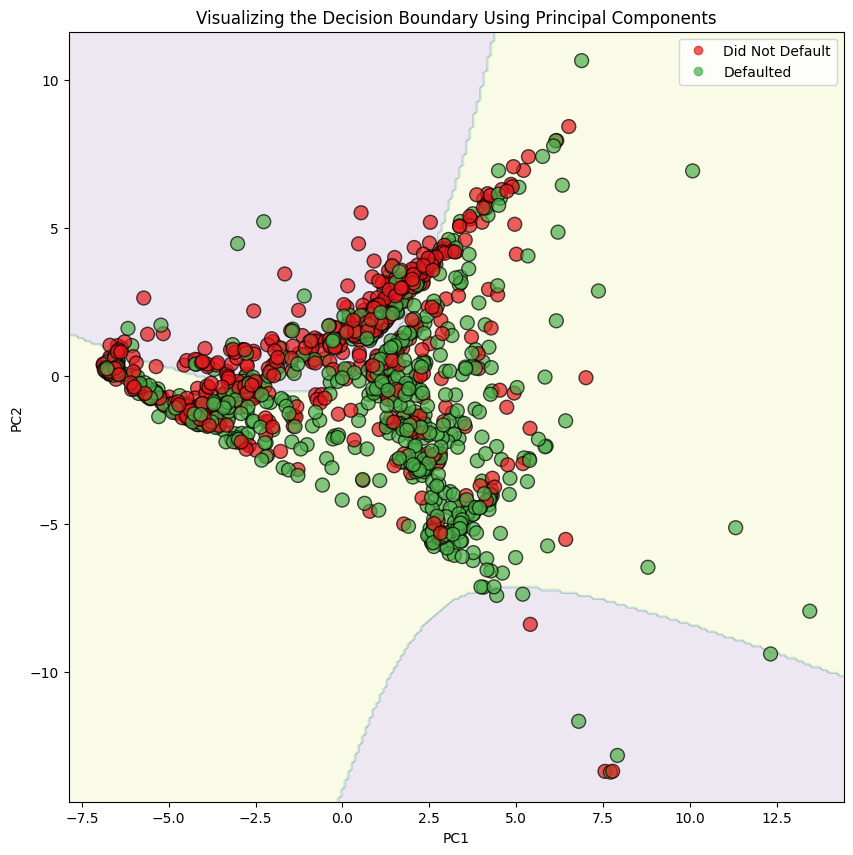

In [31]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1
y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),np.arange(start=y_min, stop=y_max, step=0.1) )

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# visualizing the data
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx,yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
legend.get_texts()[0].set_text('Did Not Default')
legend.get_texts()[1].set_text('Defaulted')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Visualizing the Decision Boundary Using Principal Components')
plt.show()

The yellow area represents "defaulted" predictions, whereas the pink area represents data where accounts are not expected to default. All of the dots are part of the training set, indicating their respective classification as denoted in the legend.

In summary, I learned how to apply SVM classification to classify data around credit card defaults. I also fine-tuned your classifier by optimizing the hyperparameters, allowing for minor improvements in accuracy. Finally, I applied PCA to visualize the decision boundaries for any new data, gaining insight into class separability and the limitations of this particular classifier.

Reference: https://developer.ibm.com/tutorials/awb-classifying-data-svm-algorithm-python/